## Wine type prediction

In this part, we use wine properties to predict whether a wine is red or white

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
# Load the combined wine dataframe

df = pd.read_csv('winequality.csv')
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
df['isRed'].value_counts()

0    4898
1    1599
Name: isRed, dtype: int64

In [4]:
target = df['isRed']
df.drop(['quality', 'isRed', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Separate the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

In [6]:
# Scale the data

scaler = StandardScaler()
scaler.fit_transform(x_train, y_train)
scaler.transform(x_test)

array([[ 0.27824755, -0.84644758, -0.40665115, ..., -1.47646179,
        -0.28966456,  1.51251301],
       [-0.32928744,  0.53962681, -0.13190482, ..., -1.35174446,
        -1.08597942,  1.26115383],
       [ 0.20230568, -0.78618347,  0.1428415 , ...,  1.82854758,
        -0.42238371,  0.17193071],
       ...,
       [ 0.7338988 , -0.36433474,  0.69233416, ..., -0.79051645,
        -0.95326028,  0.75843547],
       [-1.24058994, -0.06301423, -0.26927799, ...,  1.70383025,
         0.30757158,  0.3395035 ],
       [ 0.65795693, -0.30407064,  1.17314023, ..., -0.47872312,
        -0.82054114,  0.25571711]])

**Dummy classifier**

In [7]:
model = DummyClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

model.score(x_test, y_test)

0.7594871794871795

In [8]:
print(confusion_matrix(y_test, pred))

[[1481    0]
 [ 469    0]]


In [9]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1481
           1       0.00      0.00      0.00       469

    accuracy                           0.76      1950
   macro avg       0.38      0.50      0.43      1950
weighted avg       0.58      0.76      0.66      1950



C:\Users\Andy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression model**

In [10]:
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)
pred = model.predict(x_test)

model.score(x_test, y_test)

0.9815384615384616

In [11]:
print(confusion_matrix(y_test, pred))

[[1471   10]
 [  26  443]]


**Decision Tree model**

In [12]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

model.score(x_test, y_test)

0.9769230769230769

**Random Forest model**

In [13]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

model.score(x_test, y_test)

0.9923076923076923

**Gradient Boost model**

In [14]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

model.score(x_test, y_test)

0.9912820512820513

Both the Gradient Boosting Classifier and the Random Forest Classifier have good accuracy in predicting wine type.

In [15]:
model.feature_importances_

array([0.00834551, 0.04054645, 0.00204693, 0.0031822 , 0.28928373,
       0.00084631, 0.60461204, 0.02244351, 0.00966792, 0.01778008,
       0.00124532])

In [16]:
model.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [17]:
feat_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
feat_importances

fixed acidity           0.008346
volatile acidity        0.040546
citric acid             0.002047
residual sugar          0.003182
chlorides               0.289284
free sulfur dioxide     0.000846
total sulfur dioxide    0.604612
density                 0.022444
pH                      0.009668
sulphates               0.017780
alcohol                 0.001245
dtype: float64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

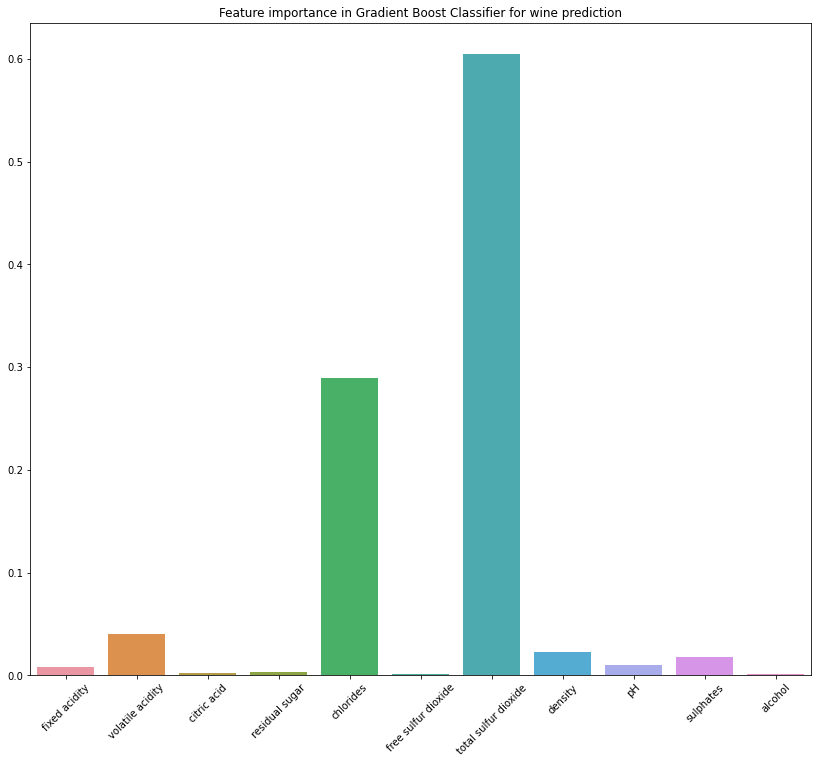

In [19]:
fig = plt.figure(figsize=(14, 12))
sns.barplot(x=feat_importances.index, y=feat_importances.values)
plt.xticks(rotation=45)
plt.title('Feature importance in Gradient Boost Classifier for wine prediction')
plt.show()